In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [5]:
import numpy as np

fish_data = np.column_stack((fish_length,fish_weight))
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

In [12]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data,fish_target, stratify=fish_target, random_state=42)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)
kn.predict([[25,150]])

array([0.])

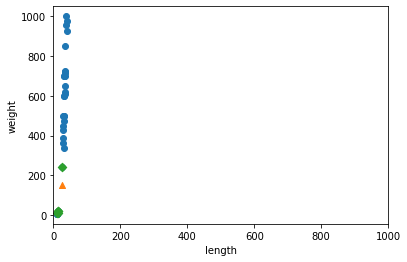

In [24]:
import matplotlib.pyplot as plt

distances, indexes = kn.kneighbors([[25,150]]) # 가장 가까운 이웃 찾기

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^') # 새 데이터값 표시
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D') # 새 데이터의 이웃값 표시
plt.xlim((0,1000)) # x축의 범위를 y축과 동일하게 만듦
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [34]:
mean = np.mean(train_input,axis=0) # 평균
std = np.std(train_input,axis=0) # 표준편차

train_scaled = (train_input-mean)/std # 표준점수

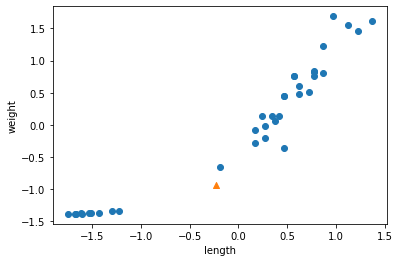

In [36]:
new = ([25,150]-mean)/std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [38]:
kn.fit(train_scaled, train_target)

test_scaled = (test_input-mean)/std
kn.score(test_scaled,test_target)

1.0

In [39]:
kn.predict([new])

array([1.])

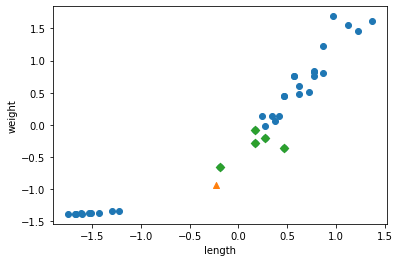

In [40]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()